<a href="https://colab.research.google.com/github/ChanikaKavindi/Identifying-Ayurvedic-Leaf-Classifier-/blob/main/Implementation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [17]:
!kaggle datasets download -d vihangahwijesinghe/sri-lankan-ayurvedic-plants -p /content

Dataset URL: https://www.kaggle.com/datasets/vihangahwijesinghe/sri-lankan-ayurvedic-plants
License(s): apache-2.0
100% 4.57G/4.58G [01:13<00:00, 25.8MB/s]
100% 4.58G/4.58G [01:13<00:00, 67.0MB/s]


In [18]:
!unzip -q "/content/sri-lankan-ayurvedic-plants.zip" -d /content/ayurvedic_dataset

In [19]:
!ls /content/ayurvedic_dataset

'Sri Lankan Ayurvedic Plant'


In [20]:
import os

BASE_DIR = "/content/ayurvedic_dataset/Sri Lankan Ayurvedic Plant/Leaf Images - Not Annotated"

print("Plant Classes:")
print(os.listdir(BASE_DIR))

Plant Classes:
['kowakka', 'heen-bovitiya', 'yaki-naran', 'karapincha']


In [21]:
import os

class_counts = {}

for class_name in os.listdir(BASE_DIR):

    class_path = os.path.join(BASE_DIR, class_name)

    if os.path.isdir(class_path):

        num_images = len(os.listdir(class_path))

        class_counts[class_name] = num_images


for c,n in class_counts.items():
    print(c,":",n)

kowakka : 490
heen-bovitiya : 505
yaki-naran : 526
karapincha : 498


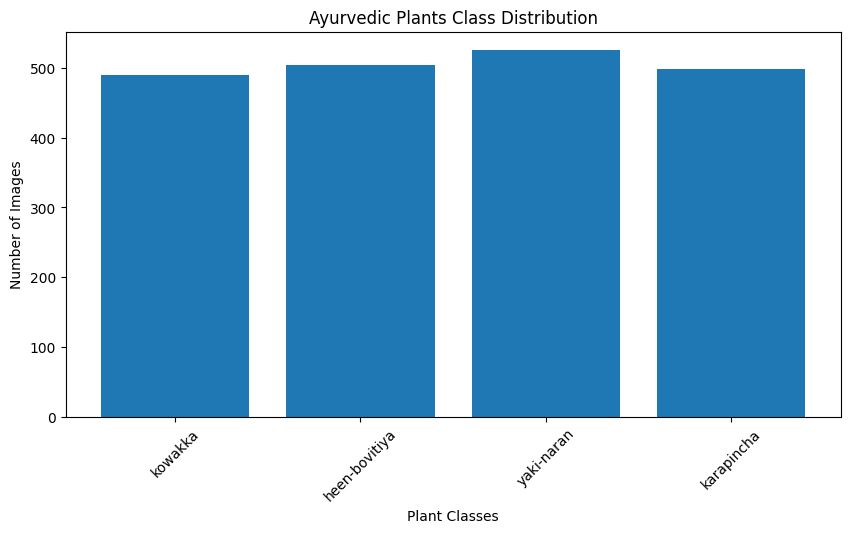

In [22]:
import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10,5))

plt.bar(classes,counts)

plt.xticks(rotation=45)

plt.xlabel("Plant Classes")
plt.ylabel("Number of Images")

plt.title("Ayurvedic Plants Class Distribution")

plt.show()

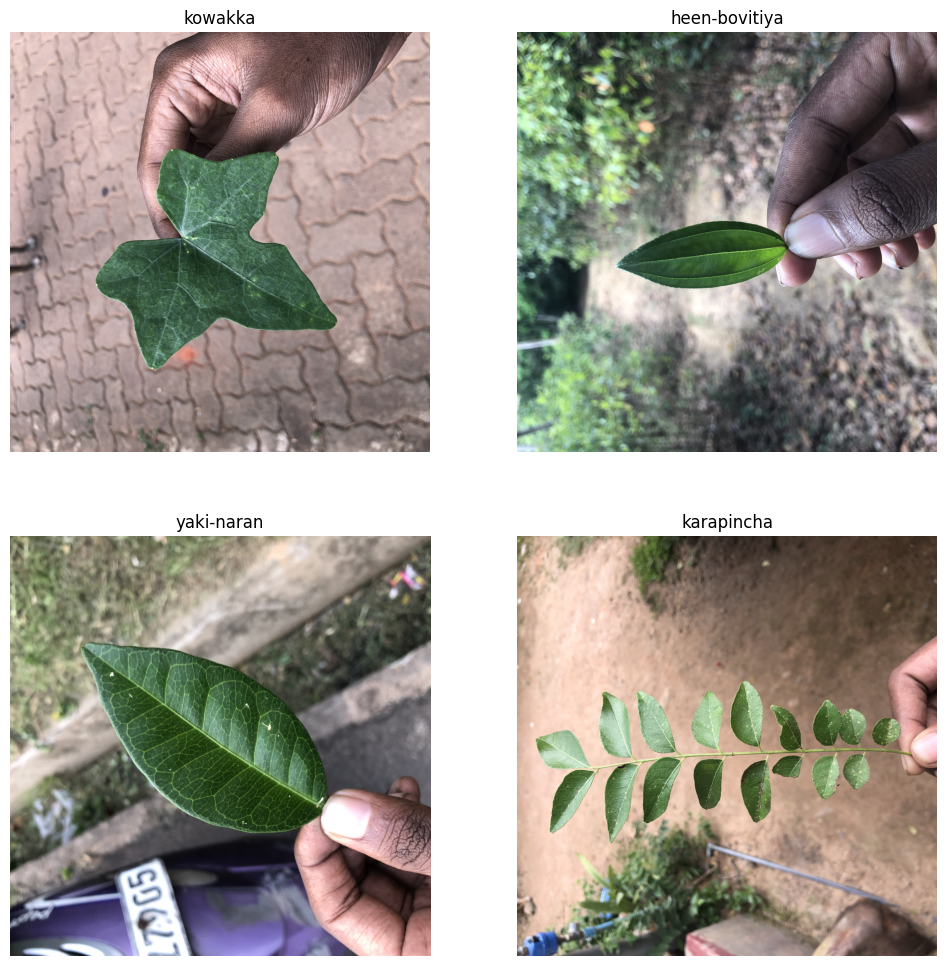

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

plt.figure(figsize=(12,12))

i = 1

for class_name in class_counts.keys():

    class_path = os.path.join(BASE_DIR,class_name)

    img_name = random.choice(os.listdir(class_path))

    img_path = os.path.join(class_path,img_name)

    img = Image.open(img_path)

    plt.subplot(2,2,i)

    plt.imshow(img)

    plt.title(class_name)

    plt.axis('off')

    i += 1

plt.show()

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!ls "/content/drive/MyDrive/kaggle/"

ls: cannot access '/content/drive/MyDrive/kaggle/': No such file or directory


In [26]:
!kaggle datasets list

ref                                                                  title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
amar5693/screen-time-sleep-and-stress-analysis-dataset               Screen Time, Sleep & Stress Analysis Dataset            787136  2026-02-13 06:56:18.757000           5879        118  1.0              
amar5693/student-performance-dataset                                 Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           5133         82  1.0              
aliiihussain/amazon-sales-dataset                                    Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           8203      

In [27]:
KAGGLE_JSON_PATH = "/content/drive/MyDrive/kaggle/kaggle.json"
!mkdir -p ~/.kaggle
!cp $KAGGLE_JSON_PATH ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory


In [28]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

In [29]:
BASE_DIR = "/content/ayurvedic_dataset"
data_path = None

for root, dirs, files in os.walk(BASE_DIR):
    if "Leaf Images - Not Annotated" in root:
        data_path = root
        break

if data_path is None:
    raise FileNotFoundError("Could not find 'Leaf Images - Not Annotated' folder in your dataset.")

print("Dataset Path Found:", data_path)

Dataset Path Found: /content/ayurvedic_dataset/Sri Lankan Ayurvedic Plant/Leaf Images - Not Annotated


In [30]:
class_names = sorted(os.listdir(data_path))
print("Classes Found:", class_names)

Classes Found: ['heen-bovitiya', 'karapincha', 'kowakka', 'yaki-naran']


In [31]:
IMG_SIZE = 128  # Resize all images to 128x128

images = []
labels = []

for label, class_name in enumerate(class_names):
    class_folder = os.path.join(data_path, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)

X = np.array(images)
y = np.array(labels)

print("\nDataset Loaded:")
print("Images Shape:", X.shape)
print("Labels Shape:", y.shape)
print("Number of Classes:", len(class_names))


Dataset Loaded:
Images Shape: (2019, 128, 128, 3)
Labels Shape: (2019,)
Number of Classes: 4


In [32]:
print("\nBefore normalization:")
print("Data type:", X.dtype)
print("Pixel range:", X.min(), "to", X.max())

X = X.astype('float32') / 255.0

print("\nAfter normalization:")
print("Data type:", X.dtype)
print("Pixel range:", X.min(), "to", X.max())


Before normalization:
Data type: uint8
Pixel range: 0 to 255

After normalization:
Data type: float32
Pixel range: 0.0 to 1.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nSplit Dataset:")
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)


Split Dataset:
Training Images: (1615, 128, 128, 3)
Testing Images: (404, 128, 128, 3)


In [36]:
import torch

X_train_tensor = torch.tensor(X_train).permute(0, 3, 1, 2)  # RGB channel first
X_test_tensor = torch.tensor(X_test).permute(0, 3, 1, 2)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("\nTensor Shapes:")
print("X_train_tensor:", X_train_tensor.shape)
print("X_test_tensor:", X_test_tensor.shape)
print("y_train_tensor:", y_train_tensor.shape)
print("y_test_tensor:", y_test_tensor.shape)


Tensor Shapes:
X_train_tensor: torch.Size([1615, 3, 128, 128])
X_test_tensor: torch.Size([404, 3, 128, 128])
y_train_tensor: torch.Size([1615])
y_test_tensor: torch.Size([404])


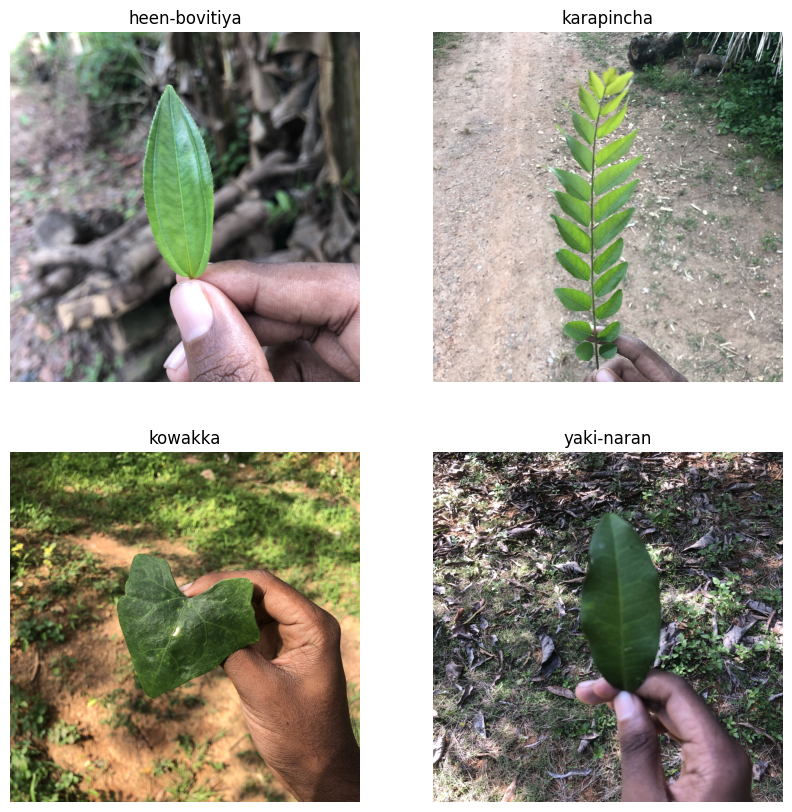

In [37]:
plt.figure(figsize=(10,10))
for i, class_name in enumerate(class_names):
    class_folder = os.path.join(data_path, class_name)
    img_name = np.random.choice(os.listdir(class_folder))
    img = cv2.imread(os.path.join(class_folder, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.show()

In [49]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch

# Set dataset path
BASE_DIR = "/content/ayurvedic_dataset/Sri Lankan Ayurvedic Plant/Leaf Images - Not Annotated"

# Define preprocessing transforms (same as before)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

# Load full dataset
full_dataset = datasets.ImageFolder(BASE_DIR, transform=transform)

# Split dataset into train and test (80% / 20%)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Optional: verify one batch
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

Device: cpu
Image batch shape: torch.Size([16, 3, 224, 224])
Label batch shape: torch.Size([16])


In [50]:
#Baseline Model Design
#Step 1 — Import Libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [51]:
#Step 2 — Define CNN Model

class BaselineCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BaselineCNN, self).__init__()

        # Convolution Block 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Convolution Block 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        # Convolution Block 3
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Fully Connected Layers
        self.fc1 = nn.Linear(64 * 28 * 28, 128)  # after 3 pools, 224→112→56→28
        self.fc2 = nn.Linear(128, num_classes)   # output: 4 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 224 → 112
        x = self.pool(F.relu(self.conv2(x)))  # 112 → 56
        x = self.pool(F.relu(self.conv3(x)))  # 56 → 28

        x = x.view(-1, 64 * 28 * 28)          # flatten

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [52]:
#Step 3 — Initialize Model

model = BaselineCNN(num_classes=4)
print(model)

BaselineCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)


In [53]:
#Step 4 — Set Device (GPU/CPU)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print("Using device:", device)

Using device: cpu


In [56]:
#Step 5 — Define Loss Function & Optimizer

criterion = nn.CrossEntropyLoss() # suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [57]:
#Step 6 — Verify Data Shapes

images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

print("Image batch shape:", images.shape)   # [batch_size, 3, 224, 224]
print("Label batch shape:", labels.shape)   # [batch_size]

Image batch shape: torch.Size([16, 3, 224, 224])
Label batch shape: torch.Size([16])
